In [22]:
import math
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action = 'ignore')

### Mean Squared Error in Vector Form
#### Question 1

### Implement a regularized L2 linear regression with Lambda ranging from 0 to 150
#### Question 2 (a)

In [23]:
# default training sets
train_100_10 = pd.read_csv('train-100-10.csv')
train_100_100 = pd.read_csv('train-100-100.csv')
train_1000_100 = pd.read_csv('train-1000-100.csv')

# contrived training sets
train_50_1000_100 = pd.read_excel('train-50(1000)-100.xlsx')
train_100_1000_100 = pd.read_excel('train-100(1000)-100.xlsx')
train_150_1000_100 = pd.read_excel('train-150(1000)-100.xlsx')

# test sets
test_100_10 = pd.read_csv('test-100-10.csv')
test_100_100 = pd.read_csv('test-100-100.csv')
test_1000_100 = pd.read_csv('test-1000-100.csv')

In [24]:
# implementing mean squared error

def computeMse(predictionVals, y_true):
    squared_errors = [(predictionVals[i] - y_true[i]) ** 2 for i in range(len(predictionVals))]
    mse = sum(squared_errors) / len(predictionVals)
    return mse
    

Lambda Value that minimizes the Mean Squared Error for Dataset test_100_10: 15; MSE 4.0803924098251585
Lambda Value that minimizes the Mean Squared Error for Dataset test_100_100: 20; MSE 4.727102811653017
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 23; MSE 5.0675227551907245
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 9; MSE 5.275198477809022
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 23; MSE 5.0675227551907245
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 23; MSE 4.788466546257814


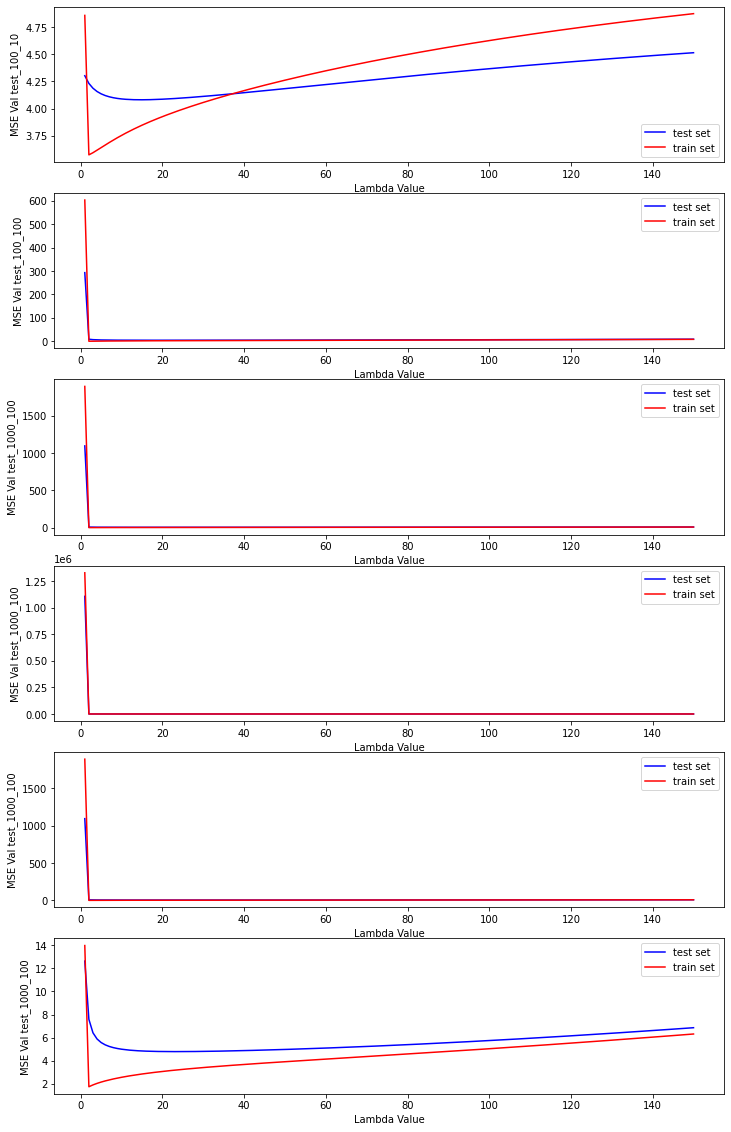

Lambda Value that minimizes the Mean Squared Error for Dataset test_100_100: 20; MSE 4.727102811653017
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 9; MSE 5.507236454746848
Lambda Value that minimizes the Mean Squared Error for Dataset test_1000_100: 23; MSE 5.0675227551907245


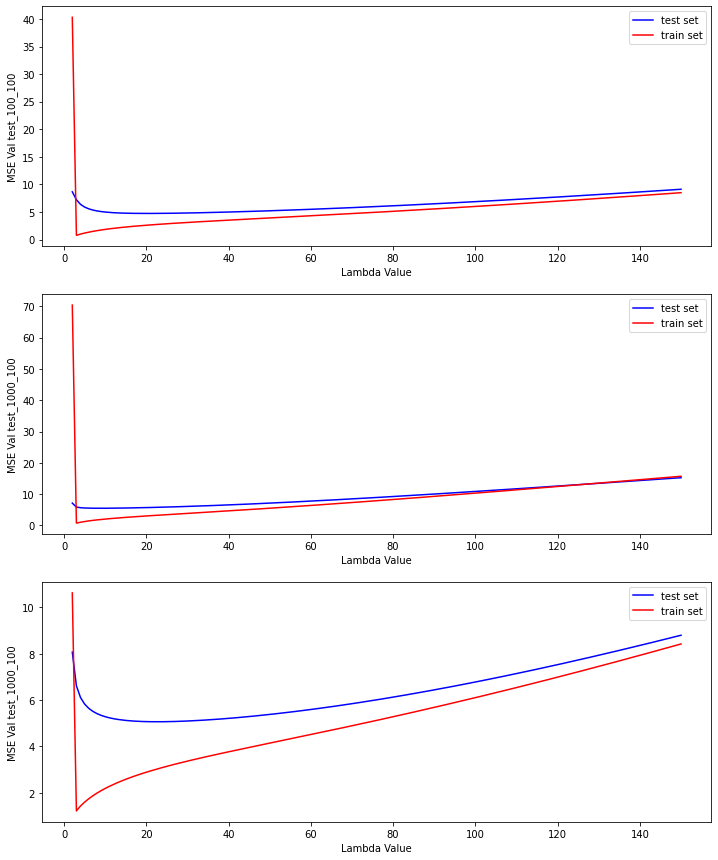

In [25]:
# L2 Regularized Linear Regression

def processTrainTest(trainfile, testfile, headSample):
    X_train = trainfile.drop(['y', "Unnamed: 11", "Unnamed: 12"],errors = 'ignore', axis = 1)
    X_test = testfile.drop(['y'], axis = 1)
    X_test = X_test.head(headSample)
    y_test = testfile['y']
    y_test = y_test.head(headSample)
    y_train = trainfile['y']
    return X_train, X_test, y_train, y_test


def insertIntercept(X):
    cols = X.columns.tolist()
    if 'intercept' not in cols:
        X['intercept'] = 1
        X = X[["intercept"] + cols]
    return X

def getCoefficients(X_train, y_train, alpha) :
    X_train = insertIntercept(X_train)
    penaltyMatrix = np.identity (X_train.shape[1])
    pen = alpha * penaltyMatrix
    pen[0][0] = 0
    B = np.linalg.inv(X_train.T @ X_train + pen) @ X_train.T @ y_train
    B = np.array(B).reshape(-1,1)
    return B

def computePredictions(X_test, coefs):
    X_test = insertIntercept(X_test)
    pred = X_test @ coefs
    pred = pred.rename(columns = {0: "Predictions"})
    return pred


# Driver code for running L2 Regression Experiments
def experimentLogic(trainfiles, testfiles, testfileNames, ax, lambdaToStart):
    for i in range(len(trainfiles)):
        preds = []
        mse = {}
        mseTrain = {}
        if i < 2:
            X_train, X_test, y_train, y_test = processTrainTest(trainfiles[i], testfiles[i], 100)
        else:
            X_train, X_test, y_train, y_test = processTrainTest(trainfiles[i], testfiles[i], 1000)
        for j in range(lambdaToStart, 150):
            B = getCoefficients(X_train, y_train, j)
            pred_train = computePredictions(X_train, B)
            pred = computePredictions(X_test, B)
            mseTrain[j+1] = computeMse(pred_train['Predictions'], y_train)
            mse[j+1] = computeMse(pred['Predictions'], y_test)
            preds.append(pred)
            
        mseDf = pd.DataFrame(columns=["lambda", "mseval", "mseTrainVal"])
        mseDf = mseDf.append(pd.DataFrame({"lambda": list(mse.keys()), "mseval": list(mse.values()), "mseTrainVal": list(mseTrain.values())}), ignore_index=True)
        ax[i].plot(mseDf['lambda'], mseDf["mseval"], 'b-', label='test set')
        ax[i].plot(mseDf['lambda'], mseDf['mseTrainVal'], 'r-', label='train set')
        ax[i].set_xlabel('Lambda Value')
        ax[i].set_ylabel('MSE Val {}'.format(testfileNames[i]))
        # ax[i].set_ylim([0,mseDf['mseval'].mean()+2])

        ax[i].legend()

        mseDf = mseDf.sort_values(by='mseval', ascending=True)
        minLambda = mseDf['lambda'].iloc[0]
        minMse = mseDf['mseval'].iloc[0]

        
        print('Lambda Value that minimizes the Mean Squared Error for Dataset {}: {}; MSE {}'.format(testfileNames[i], minLambda, minMse))
    plt.show()
    
# Executes the experiment logic function.
def runExperiments():
    fig1, ax = plt.subplots(6, 1, figsize=(12, 20))
    trainfiles = [train_100_10, train_100_100, train_100_1000_100, train_50_1000_100, train_100_1000_100, train_150_1000_100]
    testfiles = [test_100_10, test_100_100, test_1000_100, test_1000_100, test_1000_100, test_1000_100]
    testfileNames = ['test_100_10', 'test_100_100', 'test_1000_100', 'test_1000_100', 'test_1000_100', 'test_1000_100']
    modifiedTrainfiles = [train_100_100, train_50_1000_100, train_100_1000_100]
    modifiedTestFiles = [test_100_100, test_1000_100, test_1000_100]
    modifiedTestFileNames = ['test_100_100', 'test_1000_100', 'test_1000_100']

    # run first test 
    experimentLogic(trainfiles, testfiles, testfileNames, ax, lambdaToStart=0)
    # run second test
    fig2, ax1 = plt.subplots(3, 1, figsize = (12,15))
    experimentLogic(modifiedTrainfiles, modifiedTestFiles, modifiedTestFileNames, ax1, lambdaToStart=1 )

    
runExperiments()


The large errors in the MSE values in the 3 training sets are most likely due to over fitting while the loss function is turned off - lambda = 0.  The model is essentially too complex.

In [42]:
# # Implementing Cross Validation for parameter selection

def returnFolds(trainSet, numFolds):
    foldSize = len(trainSet) // numFolds
    foldList = []

    for i in range(numFolds):
        startingIndex = foldSize * i
        endingIndex = foldSize * (i + 1) if i < numFolds - 1 else len(trainSet)
        currentFold = trainSet.iloc[startingIndex:endingIndex].reset_index(drop=True)
        foldList.append(currentFold)

    return foldList

def crossVal(trainSet, testSet, numFolds, lambdaToStart, lambdaEnd):
    if len(testSet.index) > 100:
        X_train, X_test, y_train, y_test = processTrainTest(trainSet, testSet, 1000)
    else:
        X_train, X_test, y_train, y_test = processTrainTest(trainSet, testSet, 100)

    folds = returnFolds(X_train, numFolds)
    mseDict = {}

    for i in range(lambdaToStart, lambdaEnd + 1):
        performance = []
        for j in range(numFolds-1):
            X_train_df = pd.DataFrame()
            y_train_df = pd.DataFrame()
            foldIndexes= [k for k in range(numFolds) if k != j]
            for index in foldIndexes:
                df = folds[index]
                getIndexVals = df.index.tolist()
                print(index, X_train_df)
                print(index, df)
                X_train_df = pd.concat([X_train_df, df], ignore_index=True)
                y_train_df = pd.concat([y_train_df, y_train[getIndexVals]], ignore_index = True)


            print(X_train_df.to_string())

            x_test = folds[j]
            y_test_fold = y_test[x_test.index]

            B = getCoefficients(X_train_df, y_train_df, i)
            # print(B)
            
            preds = computePredictions(x_test, B)
            mse = computeMse(preds['Predictions'], y_test_fold)
            performance.append(mse)

        sumPerform = 0
        for k in range(len(performance)):
            sumPerform += performance[k]
        avgMse = sumPerform/len(performance)
        mseDict[i] = avgMse
        # print('MSE DICT', mseDict)
        # print('avgmse', avgMse)
    
    bestLambda = min(mseDict, key=mseDict.get)
    print(mseDict[bestLambda])
    # print(bestLambda)

    return bestLambda


def runCvExperiment():
        trainfiles = [train_100_10]#, train_100_100, train_100_1000_100, train_50_1000_100, train_100_1000_100, train_150_1000_100]
        testfiles = [test_100_10]# test_100_100, test_1000_100, test_1000_100, test_1000_100, test_1000_100]
        testfileNames = ['test_100_10', 'test_100_100', 'test_1000_100', 'test_1000_100', 'test_1000_100', 'test_1000_100']
        trainfileNames = ["train_100_10", "train_100_100", "train_100_1000_100", "train_50_1000_100", "train_100_1000_100", "train_150_1000_100"]
        lambdaValList = []

        for i in range(len(trainfiles)):
            val = crossVal(trainfiles[i], testfiles[i], numFolds=10, lambdaToStart=1, lambdaEnd=1)
            lambdaValList.append(val)
            print("{}, {} Optimized Lambda Value: {}".format(trainfileNames[i],testfileNames[i], lambdaValList[i]))

# lambdaVal = crossVal(train_1000_100, test_1000_100, numFolds=10, lambdaToStart=0, lambdaEnd=150)
# print("Optimized Lambda Value:", lambdaVal)

runCvExperiment()

Empty DataFrame
Columns: []
Index: []
         x1        x2        x3       x4       x5       x6        x7  \
0  0.161980  0.223170  0.113330  0.51195  0.65459  0.40908  0.471400   
1  0.189020  0.490650  0.209330  0.83678  0.44578  0.75190  0.560890   
2  0.360230  0.674720  0.909980  0.36078  0.82103  0.61317  0.469610   
3  0.832820  0.033744  0.764220  0.42769  0.80845  0.57786  0.766880   
4  0.124470  0.814080  0.086906  0.90845  0.15264  0.20375  0.996990   
5  0.765320  0.401430  0.754100  0.34833  0.14285  0.97197  0.737350   
6  0.662850  0.880040  0.149990  0.75654  0.35848  0.15090  0.624870   
7  0.051188  0.843870  0.268510  0.23248  0.36323  0.92639  0.432860   
8  0.150940  0.734540  0.530950  0.62960  0.67947  0.93668  0.045696   
9  0.026407  0.468000  0.908990  0.98570  0.83319  0.49136  0.795030   

         x8       x9      x10  
0  0.074574  0.38543  0.40093  
1  0.867570  0.98626  0.73288  
2  0.335690  0.74915  0.89629  
3  0.390500  0.16803  0.39332  
4  0.2079